In [4]:
import os
import pandas as pd
from cv2 import imread
import matplotlib.pyplot as plt

import keras
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50, VGG19


import warnings
warnings.filterwarnings("ignore")


In [5]:

path='C:/Users/ariji/Desktop/brain_tumor_dataset'
#advertising = pd.read_csv(path)

image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.1)    

training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

testing_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                  color_mode='rgb',
                                                 class_mode='binary')

Found 229 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


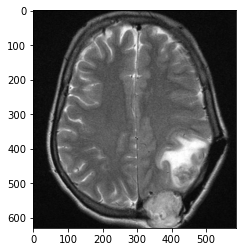

In [6]:
yes_path = path+"/yes/"+os.listdir(path+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

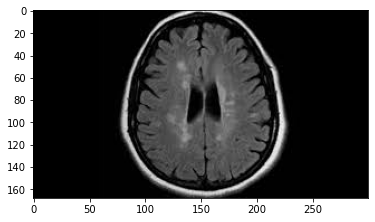

In [7]:
no_path = path+"/no/"+os.listdir(path+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [8]:
testing_set.class_indices

{'no': 0, 'yes': 1}

In [9]:
model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

In [10]:
for layers in model.layers:
    layers.trainable = False

In [11]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [12]:
hist = model.fit_generator(training_set,validation_data = testing_set, epochs = 10)

Epoch 1/10
15/15 [==============================] - 30s 2s/step - loss: 2.5891 - accuracy: 0.5371 - val_loss: 1.4476 - val_accuracy: 0.6250
Epoch 2/10
15/15 [==============================] - 28s 2s/step - loss: 1.1199 - accuracy: 0.6201 - val_loss: 0.5746 - val_accuracy: 0.7500
Epoch 3/10
15/15 [==============================] - 37s 3s/step - loss: 0.7810 - accuracy: 0.6681 - val_loss: 0.6190 - val_accuracy: 0.7917
Epoch 4/10
15/15 [==============================] - 32s 2s/step - loss: 0.5446 - accuracy: 0.7642 - val_loss: 0.6008 - val_accuracy: 0.7917
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.4498 - accuracy: 0.8210 - val_loss: 0.5157 - val_accuracy: 0.7083
Epoch 6/10
15/15 [==============================] - 32s 2s/step - loss: 0.4762 - accuracy: 0.7860 - val_loss: 0.4902 - val_accuracy: 0.7917
Epoch 7/10
15/15 [==============================] - 32s 2s/step - loss: 0.8084 - accuracy: 0.6856 - val_loss: 0.6049 - val_accuracy: 0.7917
Epoch 8/10
15/15 [==

In [13]:
hist = hist.history

Text(0, 0.5, 'accuracy')

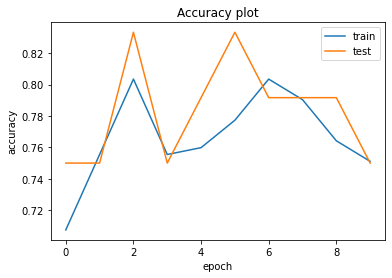

In [14]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

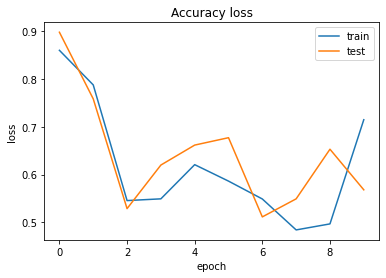

In [15]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [22]:
maximum_acc=max(hist["accuracy"])
minimum_acc=min(hist["loss"])

In [25]:
maximum_acc


0.8034934401512146

In [24]:
minimum_acc

0.4843941926956177